In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [2]:
df = pd.read_csv('clean_data.csv')

/Users/Yasin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df[df.isnull().any(axis=1)==True]

,date,time,username,tweet,date_dt,year,month_of_year,day_of_week,time_dt,hour
535511,2020-06-01,02:09:07,heliosresto,Helios will continue to take your calls for pi...,NaN,NaN,NaN,NaN,NaN,NaN
535512,Delivery is available with Skip &amp; Doordash...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
535513,Thank you for your continued support Winnipeg!...,2020-06-01 00:00:00,2020,June,Monday,1900-01-01 02:09:07,2,NaN,NaN,NaN
575736,2020-05-13,12:05:51,mongowest,Your favourite restaurant is now open for take...,NaN,NaN,NaN,NaN,NaN,NaN
575737,#mongolianvillagewest #food #offers #freshingr...,2020-05-13 00:00:00,2020,May,Wednesday,1900-01-01 12:05:51,12,NaN,NaN,NaN


In [4]:
df = df.dropna()

In [5]:
df = df.reset_index(drop=True)

In [6]:
df[df.isnull().any(axis=1)==True]

,date,time,username,tweet,date_dt,year,month_of_year,day_of_week,time_dt,hour


In [7]:
df.head()

,date,time,username,tweet,date_dt,year,month_of_year,day_of_week,time_dt,hour
0,2020-12-30,18:59:32,ubetnot1,@FaZeApex @DoorDash That one you got there loo...,2020-12-30 00:00:00,2020,December,Wednesday,1900-01-01 18:59:32,18.0
1,2020-12-30,18:58:52,chungdaveeed,@doordash_ i listen while studying,2020-12-30 00:00:00,2020,December,Wednesday,1900-01-01 18:58:52,18.0
2,2020-12-30,18:58:41,dida34,Open until 10pm 2115 S State St https://t.co/...,2020-12-30 00:00:00,2020,December,Wednesday,1900-01-01 18:58:41,18.0
3,2020-12-30,18:58:34,mikeyaeger38,Doordash time.,2020-12-30 00:00:00,2020,December,Wednesday,1900-01-01 18:58:34,18.0
4,2020-12-30,18:58:26,lebronsleague,@damemorris95 Haha i feel u😂. Always got DoorD...,2020-12-30 00:00:00,2020,December,Wednesday,1900-01-01 18:58:26,18.0


In [8]:
df.columns

Index(['date', 'time', 'username', 'tweet', 'date_dt', 'year', 'month_of_year',
       'day_of_week', 'time_dt', 'hour'],
      dtype='object')

In [10]:
df = df.drop(columns=['date', 'time', 'username', 'date_dt', 'year',
       'month_of_year', 'day_of_week', 'time_dt', 'hour'])
df = df.reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349225 entries, 0 to 1349224
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   tweet   1349225 non-null  object
dtypes: object(1)
memory usage: 10.3+ MB


In [12]:
%%time
analyzer = SentimentIntensityAnalyzer()
scores = [analyser.polarity_scores(x) for x in df['tweet']]

CPU times: user 4min 56s, sys: 3.65 s, total: 5min
Wall time: 5min 19s


In [13]:
%%time
scores

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


[{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.159, 'neu': 0.518, 'pos': 0.323, 'compound': 0.8126},
 {'neg': 0.212, 'neu': 0.57, 'pos': 0.218, 'compound': 0.0258},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.056, 'neu': 0.681, 'pos': 0.263, 'compound': 0.8392},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.3818},
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound

In [14]:
print(scores[0].keys())

dict_keys(['neg', 'neu', 'pos', 'compound'])


In [15]:
df1 = pd.DataFrame(scores)
df1

,neg,neu,pos,compound
0,0.000,0.775,0.225,0.4404
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.159,0.518,0.323,0.8126
...,...,...,...,...
1349220,0.000,0.795,0.205,0.8501
1349221,0.071,0.929,0.000,-0.3535
1349222,0.283,0.717,0.000,-0.7964
1349223,0.169,0.760,0.071,-0.6093


In [16]:
%%time
df2 = pd.concat([df, df1], axis = 1)
df2.head()

CPU times: user 77 ms, sys: 289 ms, total: 366 ms
Wall time: 478 ms


,tweet,neg,neu,pos,compound
0,@FaZeApex @DoorDash That one you got there loo...,0.000,0.775,0.225,0.4404
1,@doordash_ i listen while studying,0.000,1.000,0.000,0.0000
2,Open until 10pm 2115 S State St https://t.co/...,0.000,1.000,0.000,0.0000
3,Doordash time.,0.000,1.000,0.000,0.0000
4,@damemorris95 Haha i feel u😂. Always got DoorD...,0.159,0.518,0.323,0.8126


In [17]:
df2[df2.isnull().any(axis=1)==True]

,tweet,neg,neu,pos,compound


In [18]:
df2.shape

(1349225, 5)

In [19]:
df2.tail()

,tweet,neg,neu,pos,compound
1349220,Apparently this is how 2019 arrives in San Fra...,0.000,0.795,0.205,0.8501
1349221,My new years resolution is to use less plastic...,0.071,0.929,0.000,-0.3535
1349222,"@cubbruin @DoorDash Nah, their chat is awful a...",0.283,0.717,0.000,-0.7964
1349223,@doordash he was up the street from me and ref...,0.169,0.760,0.071,-0.6093
1349224,@DoorDash_Help I ALREADY DID ASSHOLES.,0.531,0.469,0.000,-0.6739


In [20]:
df_sample = df2.sample(n=400, random_state=0)

In [21]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 419437 to 32773
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet     400 non-null    object 
 1   neg       400 non-null    float64
 2   neu       400 non-null    float64
 3   pos       400 non-null    float64
 4   compound  400 non-null    float64
dtypes: float64(4), object(1)
memory usage: 18.8+ KB


In [22]:
pd.set_option('display.max_colwidth', None)
df_sample

,tweet,neg,neu,pos,compound
419437,should i doordash myself a bagel?,0.000,1.000,0.000,0.0000
479354,"In the spirit of social distancing... 🍕🍜🍔🍟🥘🍱🍧🥧🌮🥪🍓 DoorDash is a great way to support local restaurants with safe, no-contact delivery. Get $15 off ($5 off each of your first 3 orders) when you sign up with this link: https://t.co/XITN1b5FKB",0.000,0.820,0.180,0.8860
46049,Recent math: $23M from @Pinterest to @FrancoiseBr / $2.5M anti- discrimination org donation / $0 @IfeomaOzoma @erikashimizu $3B ea. @DoorDash founders / $200M Main Street Strong program $6B ea. @Airbnb founders / $238M in shares for hosts / ~$50M to .org 🤔 these ratios,0.046,0.843,0.110,0.4939
916829,@DoorDash I want McDonald’s,0.000,0.698,0.302,0.0772
1310355,"You should try DoorDash, it's an awesome food delivery service. Get $7.00 off your next order when you sign up with this link: https://t.co/u3ITGwbuT8.",0.000,0.849,0.151,0.6249
...,...,...,...,...,...
1238295,@DoorDash_Help worst customer service - 140 line que to tell you my food was not delivered? Ya... using this again.:.,0.177,0.823,0.000,-0.6249
1163109,@_cjv1 don’t you got a car ?? or doordash??,0.000,1.000,0.000,0.0000
429370,"@couchtomato62 @SiakamRunsFast @CaseyJLynn @malika_andrews @MarcJSpears Agreed - same punishment for all. Only other guy to get same punishment, walked out hotel lobby door to pickup Doordash. Then came back in. He got a 10 day. Is this scale of justice the same? One was far riskier than the other. At least games hadn't started 1st time. No $ risk.",0.156,0.724,0.119,-0.5553
743780,who’s tryna ft and order door dash and have lunch tg,0.000,1.000,0.000,0.0000


In [23]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [24]:
import re
df_sample['tidy_tweet'] = np.vectorize(remove_pattern)(df_sample['tweet'], "@[\w]*")
df_sample

,tweet,neg,neu,pos,compound,tidy_tweet
419437,should i doordash myself a bagel?,0.000,1.000,0.000,0.0000,should i doordash myself a bagel?
479354,"In the spirit of social distancing... 🍕🍜🍔🍟🥘🍱🍧🥧🌮🥪🍓 DoorDash is a great way to support local restaurants with safe, no-contact delivery. Get $15 off ($5 off each of your first 3 orders) when you sign up with this link: https://t.co/XITN1b5FKB",0.000,0.820,0.180,0.8860,"In the spirit of social distancing... 🍕🍜🍔🍟🥘🍱🍧🥧🌮🥪🍓 DoorDash is a great way to support local restaurants with safe, no-contact delivery. Get $15 off ($5 off each of your first 3 orders) when you sign up with this link: https://t.co/XITN1b5FKB"
46049,Recent math: $23M from @Pinterest to @FrancoiseBr / $2.5M anti- discrimination org donation / $0 @IfeomaOzoma @erikashimizu $3B ea. @DoorDash founders / $200M Main Street Strong program $6B ea. @Airbnb founders / $238M in shares for hosts / ~$50M to .org 🤔 these ratios,0.046,0.843,0.110,0.4939,Recent math: $23M from to / $2.5M anti- discrimination org donation / $0 $3B ea. founders / $200M Main Street Strong program $6B ea. founders / $238M in shares for hosts / ~$50M to .org 🤔 these ratios
916829,@DoorDash I want McDonald’s,0.000,0.698,0.302,0.0772,I want McDonald’s
1310355,"You should try DoorDash, it's an awesome food delivery service. Get $7.00 off your next order when you sign up with this link: https://t.co/u3ITGwbuT8.",0.000,0.849,0.151,0.6249,"You should try DoorDash, it's an awesome food delivery service. Get $7.00 off your next order when you sign up with this link: https://t.co/u3ITGwbuT8."
...,...,...,...,...,...,...
1238295,@DoorDash_Help worst customer service - 140 line que to tell you my food was not delivered? Ya... using this again.:.,0.177,0.823,0.000,-0.6249,worst customer service - 140 line que to tell you my food was not delivered? Ya... using this again.:.
1163109,@_cjv1 don’t you got a car ?? or doordash??,0.000,1.000,0.000,0.0000,don’t you got a car ?? or doordash??
429370,"@couchtomato62 @SiakamRunsFast @CaseyJLynn @malika_andrews @MarcJSpears Agreed - same punishment for all. Only other guy to get same punishment, walked out hotel lobby door to pickup Doordash. Then came back in. He got a 10 day. Is this scale of justice the same? One was far riskier than the other. At least games hadn't started 1st time. No $ risk.",0.156,0.724,0.119,-0.5553,"Agreed - same punishment for all. Only other guy to get same punishment, walked out hotel lobby door to pickup Doordash. Then came back in. He got a 10 day. Is this scale of justice the same? One was far riskier than the other. At least games hadn't started 1st time. No $ risk."
743780,who’s tryna ft and order door dash and have lunch tg,0.000,1.000,0.000,0.0000,who’s tryna ft and order door dash and have lunch tg


In [25]:
df_sample['tidy_tweet'] = df_sample['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
df_sample

/Users/Yasin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,tweet,neg,neu,pos,compound,tidy_tweet
419437,should i doordash myself a bagel?,0.000,1.000,0.000,0.0000,should i doordash myself a bagel
479354,"In the spirit of social distancing... 🍕🍜🍔🍟🥘🍱🍧🥧🌮🥪🍓 DoorDash is a great way to support local restaurants with safe, no-contact delivery. Get $15 off ($5 off each of your first 3 orders) when you sign up with this link: https://t.co/XITN1b5FKB",0.000,0.820,0.180,0.8860,In the spirit of social distancing DoorDash is a great way to support local restaurants with safe no contact delivery Get off off each of your first orders when you sign up with this link https t co XITN b FKB
46049,Recent math: $23M from @Pinterest to @FrancoiseBr / $2.5M anti- discrimination org donation / $0 @IfeomaOzoma @erikashimizu $3B ea. @DoorDash founders / $200M Main Street Strong program $6B ea. @Airbnb founders / $238M in shares for hosts / ~$50M to .org 🤔 these ratios,0.046,0.843,0.110,0.4939,Recent math M from to M anti discrimination org donation B ea founders M Main Street Strong program B ea founders M in shares for hosts M to org these ratios
916829,@DoorDash I want McDonald’s,0.000,0.698,0.302,0.0772,I want McDonald s
1310355,"You should try DoorDash, it's an awesome food delivery service. Get $7.00 off your next order when you sign up with this link: https://t.co/u3ITGwbuT8.",0.000,0.849,0.151,0.6249,You should try DoorDash it s an awesome food delivery service Get off your next order when you sign up with this link https t co u ITGwbuT
...,...,...,...,...,...,...
1238295,@DoorDash_Help worst customer service - 140 line que to tell you my food was not delivered? Ya... using this again.:.,0.177,0.823,0.000,-0.6249,worst customer service line que to tell you my food was not delivered Ya using this again
1163109,@_cjv1 don’t you got a car ?? or doordash??,0.000,1.000,0.000,0.0000,don t you got a car or doordash
429370,"@couchtomato62 @SiakamRunsFast @CaseyJLynn @malika_andrews @MarcJSpears Agreed - same punishment for all. Only other guy to get same punishment, walked out hotel lobby door to pickup Doordash. Then came back in. He got a 10 day. Is this scale of justice the same? One was far riskier than the other. At least games hadn't started 1st time. No $ risk.",0.156,0.724,0.119,-0.5553,Agreed same punishment for all Only other guy to get same punishment walked out hotel lobby door to pickup Doordash Then came back in He got a day Is this scale of justice the same One was far riskier than the other At least games hadn t started st time No risk
743780,who’s tryna ft and order door dash and have lunch tg,0.000,1.000,0.000,0.0000,who s tryna ft and order door dash and have lunch tg


In [26]:
df_sample['tidy_tweet'] = df_sample['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_sample

,tweet,neg,neu,pos,compound,tidy_tweet
419437,should i doordash myself a bagel?,0.000,1.000,0.000,0.0000,should doordash myself bagel
479354,"In the spirit of social distancing... 🍕🍜🍔🍟🥘🍱🍧🥧🌮🥪🍓 DoorDash is a great way to support local restaurants with safe, no-contact delivery. Get $15 off ($5 off each of your first 3 orders) when you sign up with this link: https://t.co/XITN1b5FKB",0.000,0.820,0.180,0.8860,spirit social distancing DoorDash great support local restaurants with safe contact delivery each your first orders when sign with this link https XITN
46049,Recent math: $23M from @Pinterest to @FrancoiseBr / $2.5M anti- discrimination org donation / $0 @IfeomaOzoma @erikashimizu $3B ea. @DoorDash founders / $200M Main Street Strong program $6B ea. @Airbnb founders / $238M in shares for hosts / ~$50M to .org 🤔 these ratios,0.046,0.843,0.110,0.4939,Recent math from anti discrimination donation founders Main Street Strong program founders shares hosts these ratios
916829,@DoorDash I want McDonald’s,0.000,0.698,0.302,0.0772,want McDonald
1310355,"You should try DoorDash, it's an awesome food delivery service. Get $7.00 off your next order when you sign up with this link: https://t.co/u3ITGwbuT8.",0.000,0.849,0.151,0.6249,should DoorDash awesome food delivery service your next order when sign with this link https ITGwbuT
...,...,...,...,...,...,...
1238295,@DoorDash_Help worst customer service - 140 line que to tell you my food was not delivered? Ya... using this again.:.,0.177,0.823,0.000,-0.6249,worst customer service line tell food delivered using this again
1163109,@_cjv1 don’t you got a car ?? or doordash??,0.000,1.000,0.000,0.0000,doordash
429370,"@couchtomato62 @SiakamRunsFast @CaseyJLynn @malika_andrews @MarcJSpears Agreed - same punishment for all. Only other guy to get same punishment, walked out hotel lobby door to pickup Doordash. Then came back in. He got a 10 day. Is this scale of justice the same? One was far riskier than the other. At least games hadn't started 1st time. No $ risk.",0.156,0.724,0.119,-0.5553,Agreed same punishment Only other same punishment walked hotel lobby door pickup Doordash Then came back this scale justice same riskier than other least games hadn started time risk
743780,who’s tryna ft and order door dash and have lunch tg,0.000,1.000,0.000,0.0000,tryna order door dash have lunch


In [27]:
tokenized_tweet = df_sample['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

419437                                                                                                                                                   [should, doordash, myself, bagel]
479354     [spirit, social, distancing, DoorDash, great, support, local, restaurants, with, safe, contact, delivery, each, your, first, orders, when, sign, with, this, link, https, XITN]
46049                                                [Recent, math, from, anti, discrimination, donation, founders, Main, Street, Strong, program, founders, shares, hosts, these, ratios]
916829                                                                                                                                                                    [want, McDonald]
1310355                                                              [should, DoorDash, awesome, food, delivery, service, your, next, order, when, sign, with, this, link, https, ITGwbuT]
Name: tidy_tweet, dtype: object

In [28]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

419437                                                                                                                                         [should, doordash, myself, bagel]
479354     [spirit, social, distanc, doordash, great, support, local, restaur, with, safe, contact, deliveri, each, your, first, order, when, sign, with, thi, link, http, xitn]
46049                                                   [recent, math, from, anti, discrimin, donat, founder, main, street, strong, program, founder, share, host, these, ratio]
916829                                                                                                                                                          [want, mcdonald]
1310355                                                        [should, doordash, awesom, food, deliveri, servic, your, next, order, when, sign, with, thi, link, http, itgwbut]
Name: tidy_tweet, dtype: object

In [29]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet.iloc[i] = ' '.join(tokenized_tweet.iloc[i])

df_sample['tidy_tweet'] = tokenized_tweet
df_sample

,tweet,neg,neu,pos,compound,tidy_tweet
419437,should i doordash myself a bagel?,0.000,1.000,0.000,0.0000,should doordash myself bagel
479354,"In the spirit of social distancing... 🍕🍜🍔🍟🥘🍱🍧🥧🌮🥪🍓 DoorDash is a great way to support local restaurants with safe, no-contact delivery. Get $15 off ($5 off each of your first 3 orders) when you sign up with this link: https://t.co/XITN1b5FKB",0.000,0.820,0.180,0.8860,spirit social distanc doordash great support local restaur with safe contact deliveri each your first order when sign with thi link http xitn
46049,Recent math: $23M from @Pinterest to @FrancoiseBr / $2.5M anti- discrimination org donation / $0 @IfeomaOzoma @erikashimizu $3B ea. @DoorDash founders / $200M Main Street Strong program $6B ea. @Airbnb founders / $238M in shares for hosts / ~$50M to .org 🤔 these ratios,0.046,0.843,0.110,0.4939,recent math from anti discrimin donat founder main street strong program founder share host these ratio
916829,@DoorDash I want McDonald’s,0.000,0.698,0.302,0.0772,want mcdonald
1310355,"You should try DoorDash, it's an awesome food delivery service. Get $7.00 off your next order when you sign up with this link: https://t.co/u3ITGwbuT8.",0.000,0.849,0.151,0.6249,should doordash awesom food deliveri servic your next order when sign with thi link http itgwbut
...,...,...,...,...,...,...
1238295,@DoorDash_Help worst customer service - 140 line que to tell you my food was not delivered? Ya... using this again.:.,0.177,0.823,0.000,-0.6249,worst custom servic line tell food deliv use thi again
1163109,@_cjv1 don’t you got a car ?? or doordash??,0.000,1.000,0.000,0.0000,doordash
429370,"@couchtomato62 @SiakamRunsFast @CaseyJLynn @malika_andrews @MarcJSpears Agreed - same punishment for all. Only other guy to get same punishment, walked out hotel lobby door to pickup Doordash. Then came back in. He got a 10 day. Is this scale of justice the same? One was far riskier than the other. At least games hadn't started 1st time. No $ risk.",0.156,0.724,0.119,-0.5553,agre same punish onli other same punish walk hotel lobbi door pickup doordash then came back thi scale justic same riskier than other least game hadn start time risk
743780,who’s tryna ft and order door dash and have lunch tg,0.000,1.000,0.000,0.0000,tryna order door dash have lunch


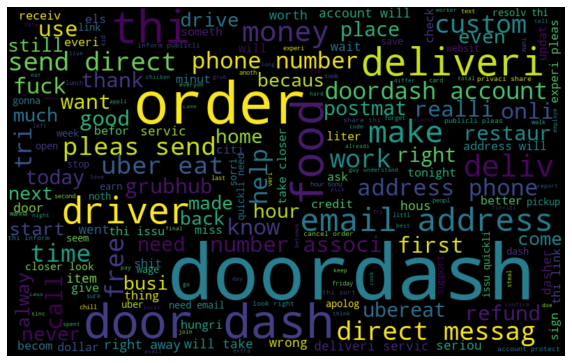

In [30]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df_sample['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

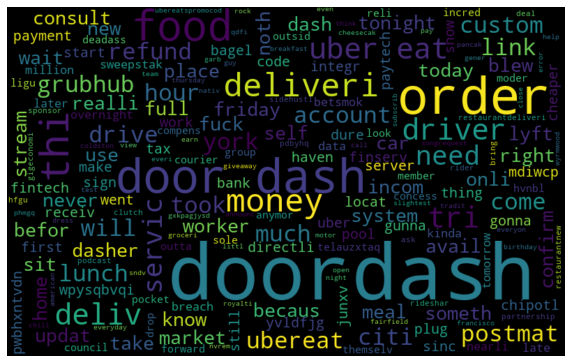

In [31]:
neutral_words =' '.join([text for text in df_sample['tidy_tweet'][df_sample['compound'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

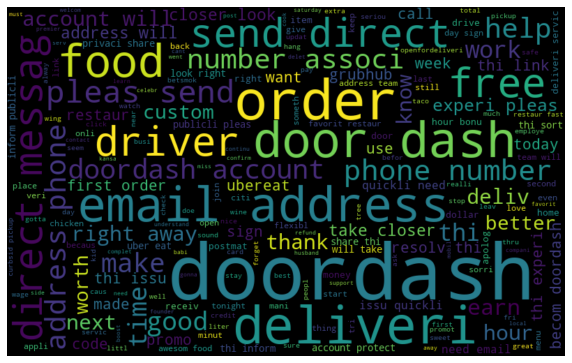

In [32]:
positive_words = ' '.join([text for text in df_sample['tidy_tweet'][df_sample['compound'] >0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

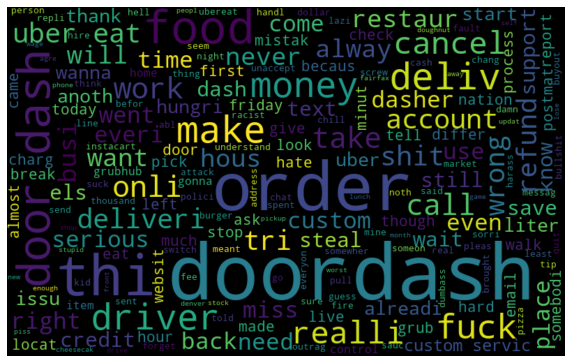

In [33]:
negative_words = ' '.join([text for text in df_sample['tidy_tweet'][df_sample['compound'] <0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
df_sample.loc[df_sample['compound']<=-0.05, 'label']=-1
df_sample.loc[df_sample['compound']>=0.05, 'label']=1
df_sample.loc[(df_sample['compound']<0.05) & (df_sample['compound']>-0.05), 'label']=0
df_sample

,tweet,neg,neu,pos,compound,tidy_tweet,label
419437,should i doordash myself a bagel?,0.000,1.000,0.000,0.0000,should doordash myself bagel,0.0
479354,"In the spirit of social distancing... 🍕🍜🍔🍟🥘🍱🍧🥧🌮🥪🍓 DoorDash is a great way to support local restaurants with safe, no-contact delivery. Get $15 off ($5 off each of your first 3 orders) when you sign up with this link: https://t.co/XITN1b5FKB",0.000,0.820,0.180,0.8860,spirit social distanc doordash great support local restaur with safe contact deliveri each your first order when sign with thi link http xitn,1.0
46049,Recent math: $23M from @Pinterest to @FrancoiseBr / $2.5M anti- discrimination org donation / $0 @IfeomaOzoma @erikashimizu $3B ea. @DoorDash founders / $200M Main Street Strong program $6B ea. @Airbnb founders / $238M in shares for hosts / ~$50M to .org 🤔 these ratios,0.046,0.843,0.110,0.4939,recent math from anti discrimin donat founder main street strong program founder share host these ratio,1.0
916829,@DoorDash I want McDonald’s,0.000,0.698,0.302,0.0772,want mcdonald,1.0
1310355,"You should try DoorDash, it's an awesome food delivery service. Get $7.00 off your next order when you sign up with this link: https://t.co/u3ITGwbuT8.",0.000,0.849,0.151,0.6249,should doordash awesom food deliveri servic your next order when sign with thi link http itgwbut,1.0
...,...,...,...,...,...,...,...
1238295,@DoorDash_Help worst customer service - 140 line que to tell you my food was not delivered? Ya... using this again.:.,0.177,0.823,0.000,-0.6249,worst custom servic line tell food deliv use thi again,-1.0
1163109,@_cjv1 don’t you got a car ?? or doordash??,0.000,1.000,0.000,0.0000,doordash,0.0
429370,"@couchtomato62 @SiakamRunsFast @CaseyJLynn @malika_andrews @MarcJSpears Agreed - same punishment for all. Only other guy to get same punishment, walked out hotel lobby door to pickup Doordash. Then came back in. He got a 10 day. Is this scale of justice the same? One was far riskier than the other. At least games hadn't started 1st time. No $ risk.",0.156,0.724,0.119,-0.5553,agre same punish onli other same punish walk hotel lobbi door pickup doordash then came back thi scale justic same riskier than other least game hadn start time risk,-1.0
743780,who’s tryna ft and order door dash and have lunch tg,0.000,1.000,0.000,0.0000,tryna order door dash have lunch,0.0


# Creating the Bag of Words Vectors

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_sample['tidy_tweet'])

# Creating TF-IDF Vectors

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_sample['tidy_tweet'])

# 1- Logistic Regression with Bag of Words

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# splitting data into training and test set
x_train_bow, x_test_bow, y_train, y_test = train_test_split(bow, df_sample['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(x_train_bow, y_train) # training the model

y_pred = lreg.predict(x_test_bow) # predicting on the test set

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        -1.0       0.41      0.57      0.48        28
         0.0       0.46      0.38      0.42        34
         1.0       0.68      0.62      0.65        58

    accuracy                           0.54       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.56      0.54      0.54       120



# 2- Logistic Regression with TF-IDF

In [38]:
# splitting data into training and test set
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(tfidf, df_sample['label'], random_state=42, test_size=0.3)

In [39]:
lreg = LogisticRegression()
lreg.fit(x_train_tfidf, y_train) # training the model

y_pred = lreg.predict(x_test_tfidf) # predicting on the test set

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        -1.0       0.41      0.52      0.46        31
         0.0       0.18      0.45      0.26        11
         1.0       0.77      0.53      0.63        78

    accuracy                           0.52       120
   macro avg       0.45      0.50      0.45       120
weighted avg       0.63      0.52      0.55       120



# 3- RandomForest with Bag of Words

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train_bow, y_train)
y_pred = clf.predict(x_test_bow)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        -1.0       0.31      0.52      0.39        23
         0.0       0.54      0.41      0.46        37
         1.0       0.70      0.62      0.65        60

    accuracy                           0.53       120
   macro avg       0.51      0.51      0.50       120
weighted avg       0.57      0.53      0.54       120



# 4- RandomForest with TF-IDF

In [41]:
clf = RandomForestClassifier()
clf.fit(x_train_tfidf, y_train)
y_pred = clf.predict(x_test_tfidf)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        -1.0       0.28      0.46      0.35        24
         0.0       0.39      0.35      0.37        31
         1.0       0.74      0.60      0.66        65

    accuracy                           0.51       120
   macro avg       0.47      0.47      0.46       120
weighted avg       0.56      0.51      0.52       120



In [43]:
df_sample.to_csv('clean_data_for _BERT.csv', index=False)